In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches

In [87]:
readed = pd.read_csv("./data/ObesityDataSet_raw_and_data_sinthetic.csv")
readed

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Primeiro vamos começar limpando o datasets, isto é, convertendo as palavras em números. Primeiro, a linha de base de obesidade será o gênero masculino. Além disso, substituiremos o valor de "yes" por 1 e "no" por 0. Por fim, como há uma a frequência é uma variável ordinal, substituímos por 1,2,3 as frequências que dizem as vezes, frequentemente e sempre.

In [89]:
map = {"Male": 0,
      "Female": 1,
      "no": 0,
      "yes": 1,
      "Sometimes": 0,
      "Frequently": 1,
      "Always": 2,
      "Insufficient_Weight": 0,
      "Normal_Weight": 1,
      "Overweight_Level_I": 2,
      "Overweight_Level_II": 3,
      "Obesity_Type_I": 4,
      "Obesity_Type_II": 5,
      "Obesity_Type_III": 6,
      "Walking": 0,
      "Public_Transportation": 1,
      "Bike": 2,
      "Motorbike": 3,
      "Automobile": 4
}

obesity_labels = [
      "Normal_Weight",
      "Overweight_Level_I",
      "Overweight_Level_II",
      "Obesity_Type_I",
      "Insufficient_Weight",
      "Obesity_Type_II",
      "Obesity_Type_III"]

readed['Height'] = readed['Height'] * 100

readed["FCVC"] = round(readed["FCVC"])
readed["NCP"] = round(readed["NCP"])
readed["CH2O"] = round(readed["CH2O"])
readed["FAF"] = round(readed["FAF"])
readed["TUE"] = round(readed["TUE"])

data = readed.replace(map)
data = data.drop(columns=["Height", "Weight"])

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\1699885647.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = readed.replace(map)


In [56]:
data

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,1,1
1,1,21.000000,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,0,1,1
2,0,23.000000,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,1,1
3,0,27.000000,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,0,2
4,0,22.000000,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1,1,3.0,3.0,0,0,2.0,0,2.0,1.0,0,1,6
2107,1,21.982942,1,1,3.0,3.0,0,0,2.0,0,1.0,1.0,0,1,6
2108,1,22.524036,1,1,3.0,3.0,0,0,2.0,0,1.0,1.0,0,1,6
2109,1,24.361936,1,1,3.0,3.0,0,0,3.0,0,1.0,1.0,0,1,6


In [92]:
colors = ["#7FC7FF",
          "#FF6961",
          "#B2FF66",
          "#FFA500",
          "#B19CD9",
          "#FFFF99",
          "red"]
weight_levels = data["NObeyesdad"].unique()
data_labels = data.drop("NObeyesdad", axis=1)

In [91]:
data.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,0.817622,0.883941,2.423496,2.687826,0.164851,0.020843,2.014685,0.045476,1.006632,0.664614,0.034107,1.636665,3.112269
std,0.500083,6.345968,0.386247,0.320371,0.583905,0.809680,0.433563,0.142893,0.688616,0.208395,0.895462,0.674009,0.184139,1.262721,1.985062
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,22.777890,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,4.000000,6.000000


## TESTE

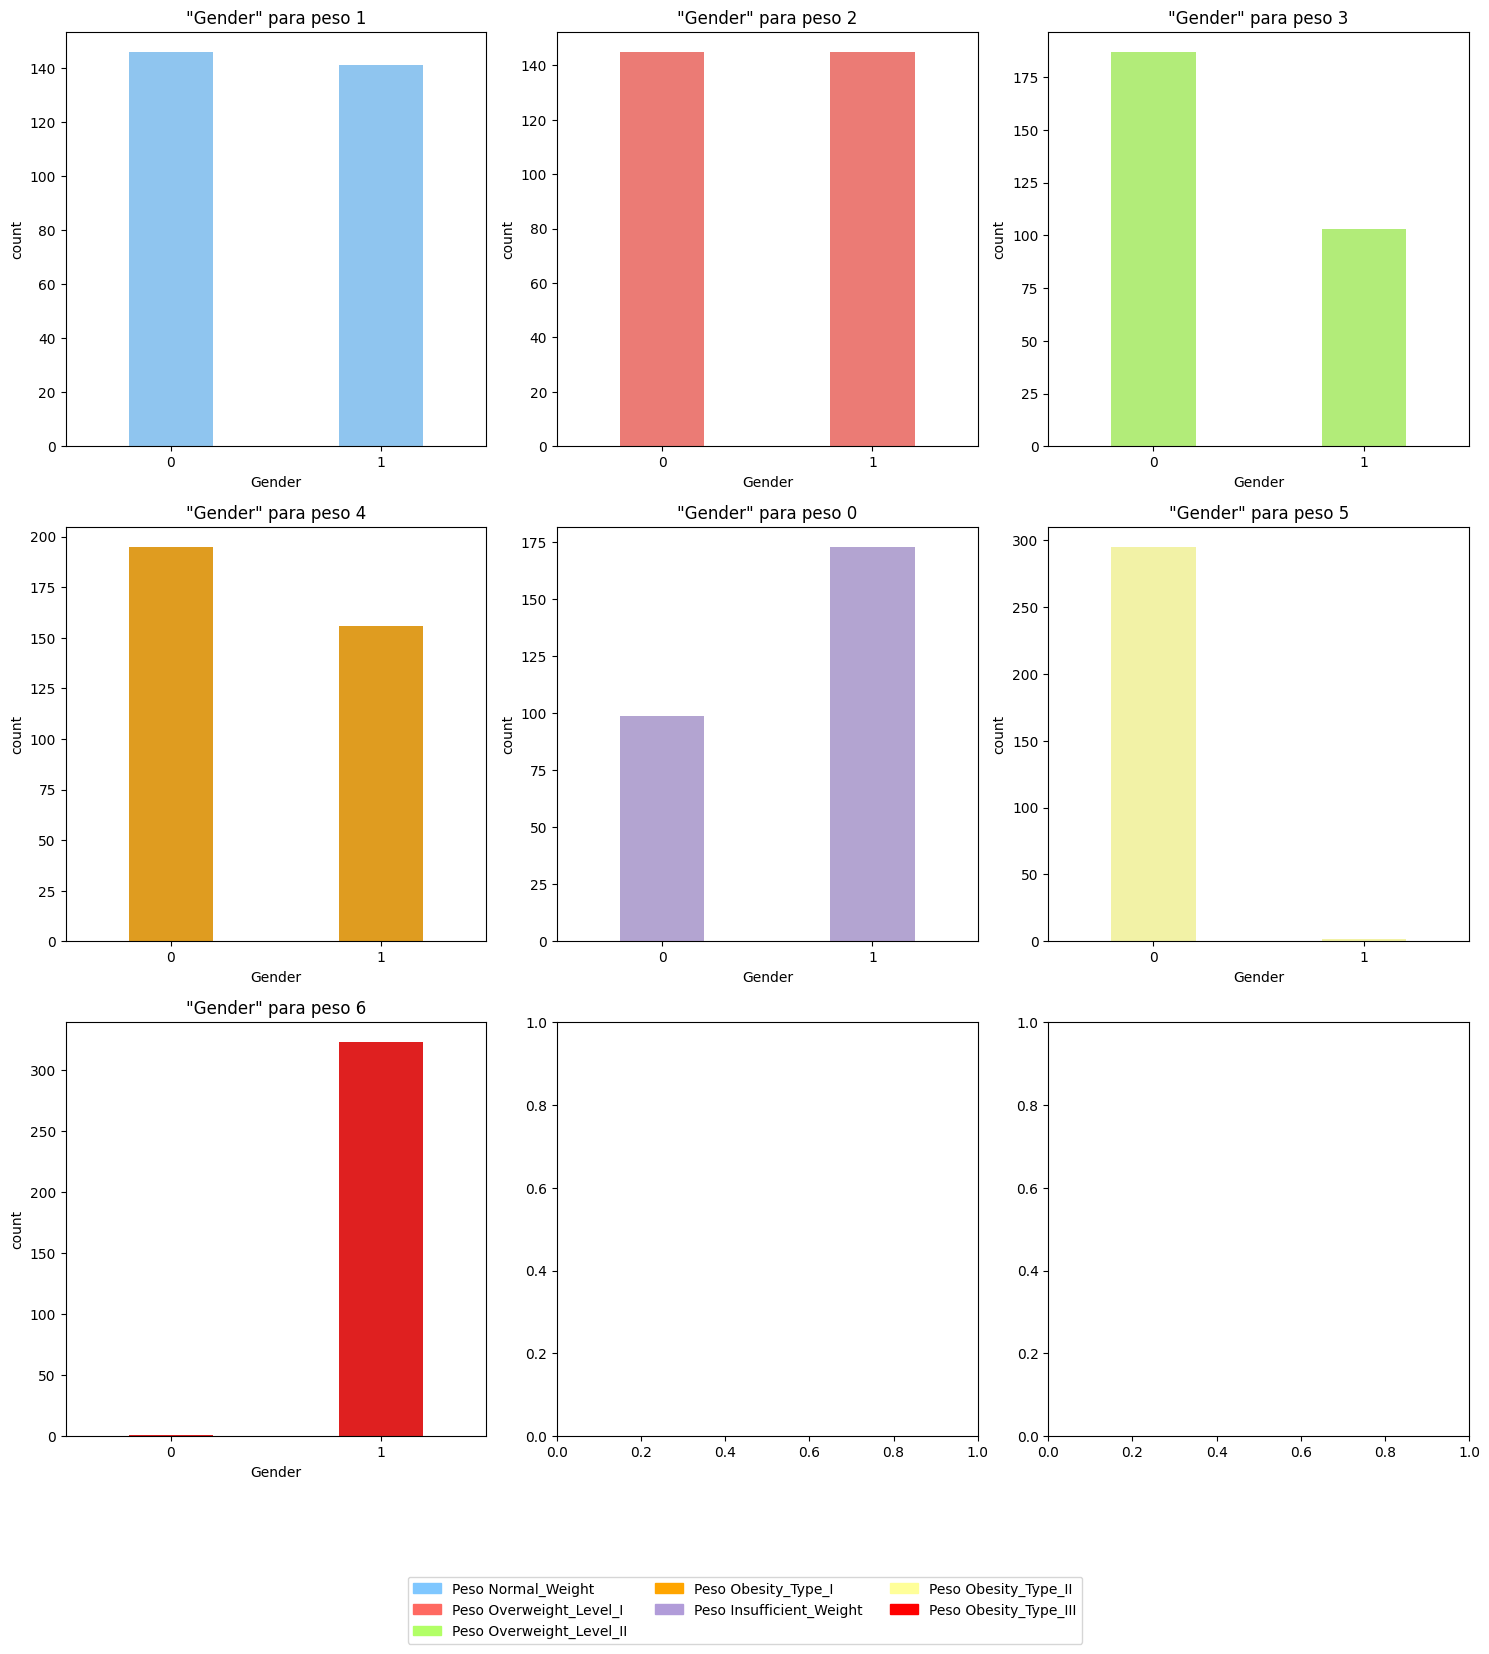

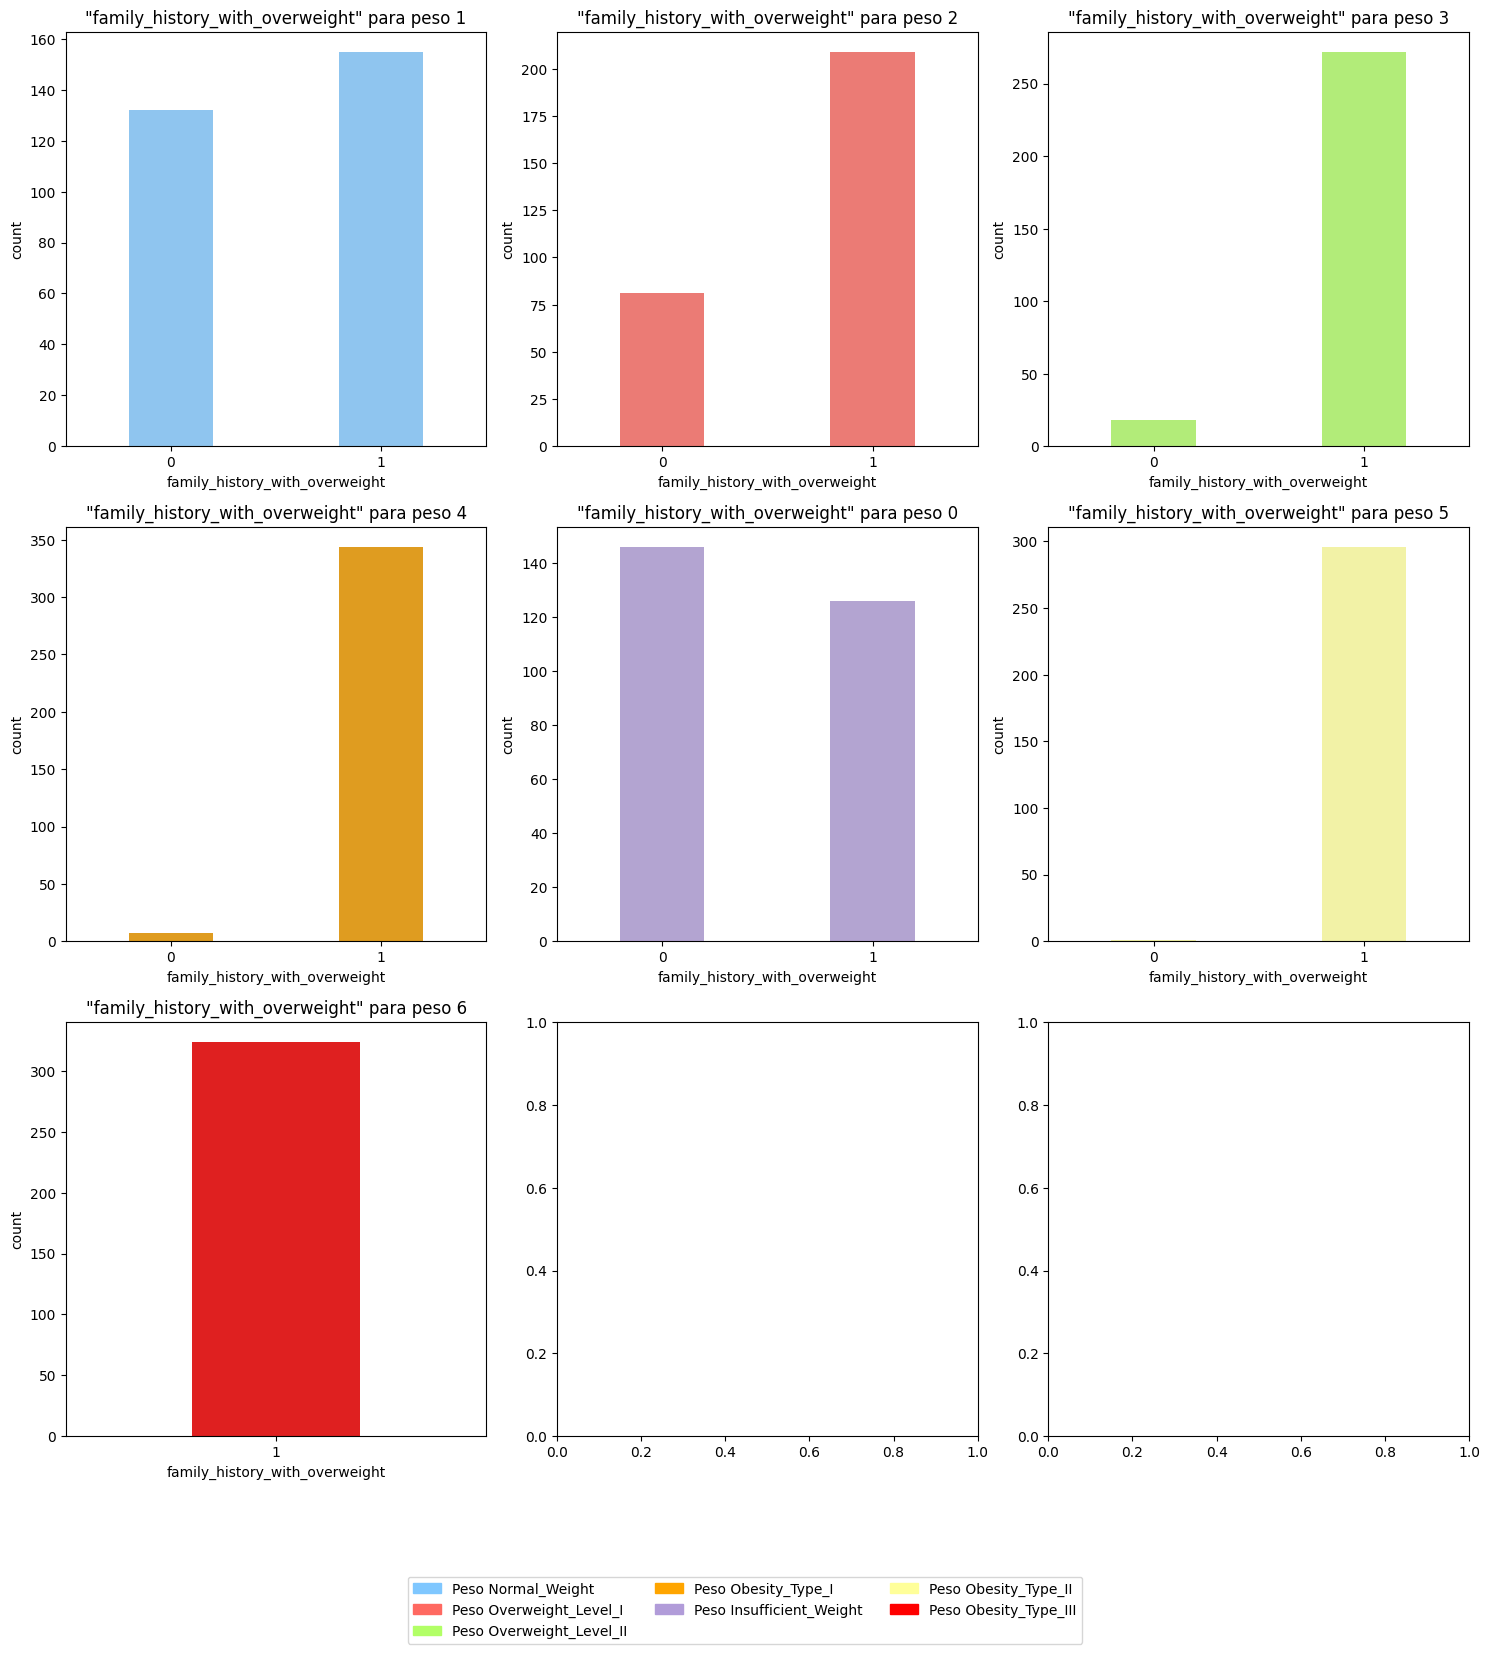

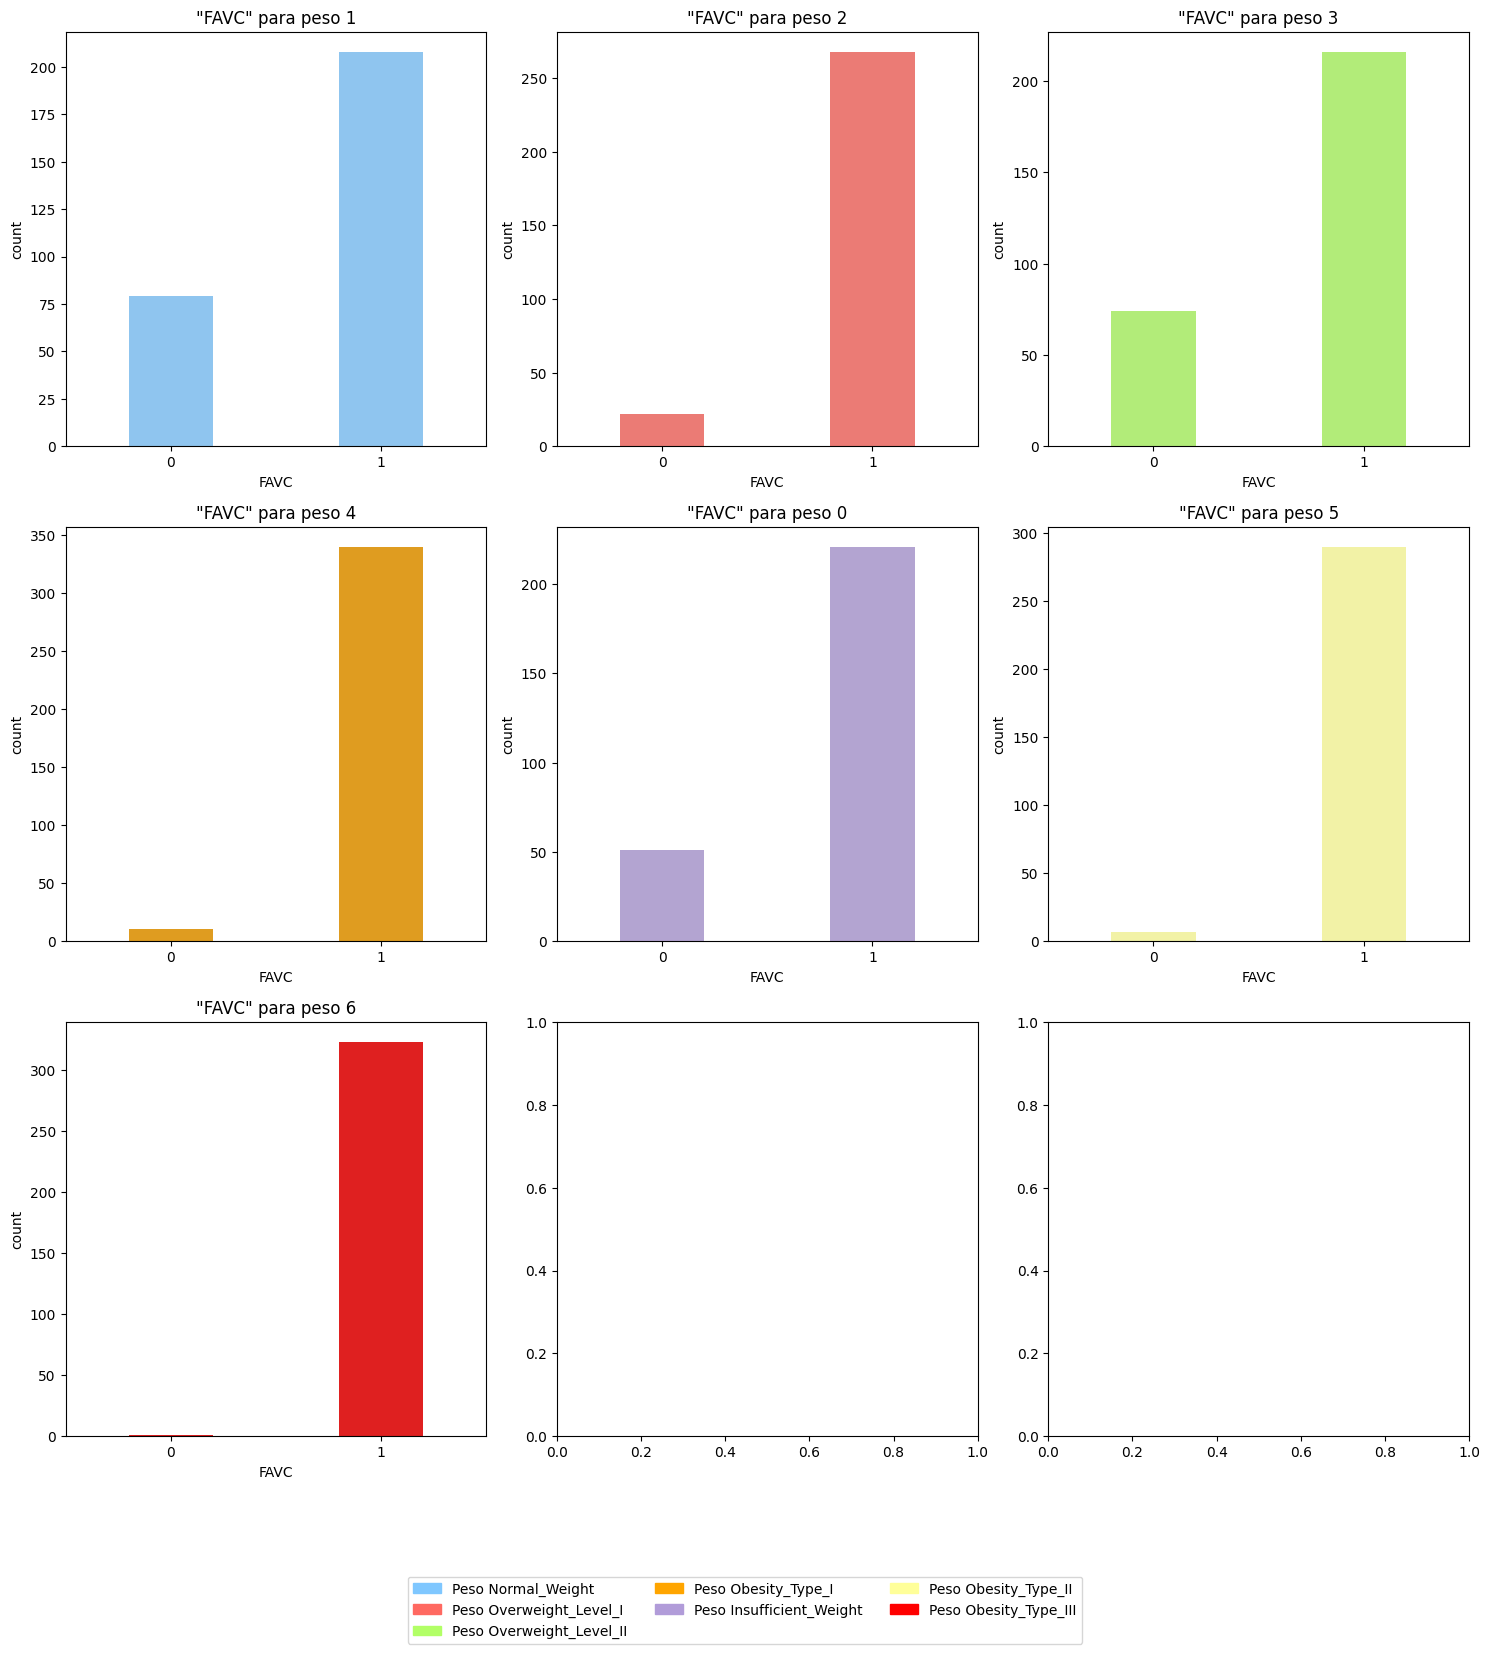

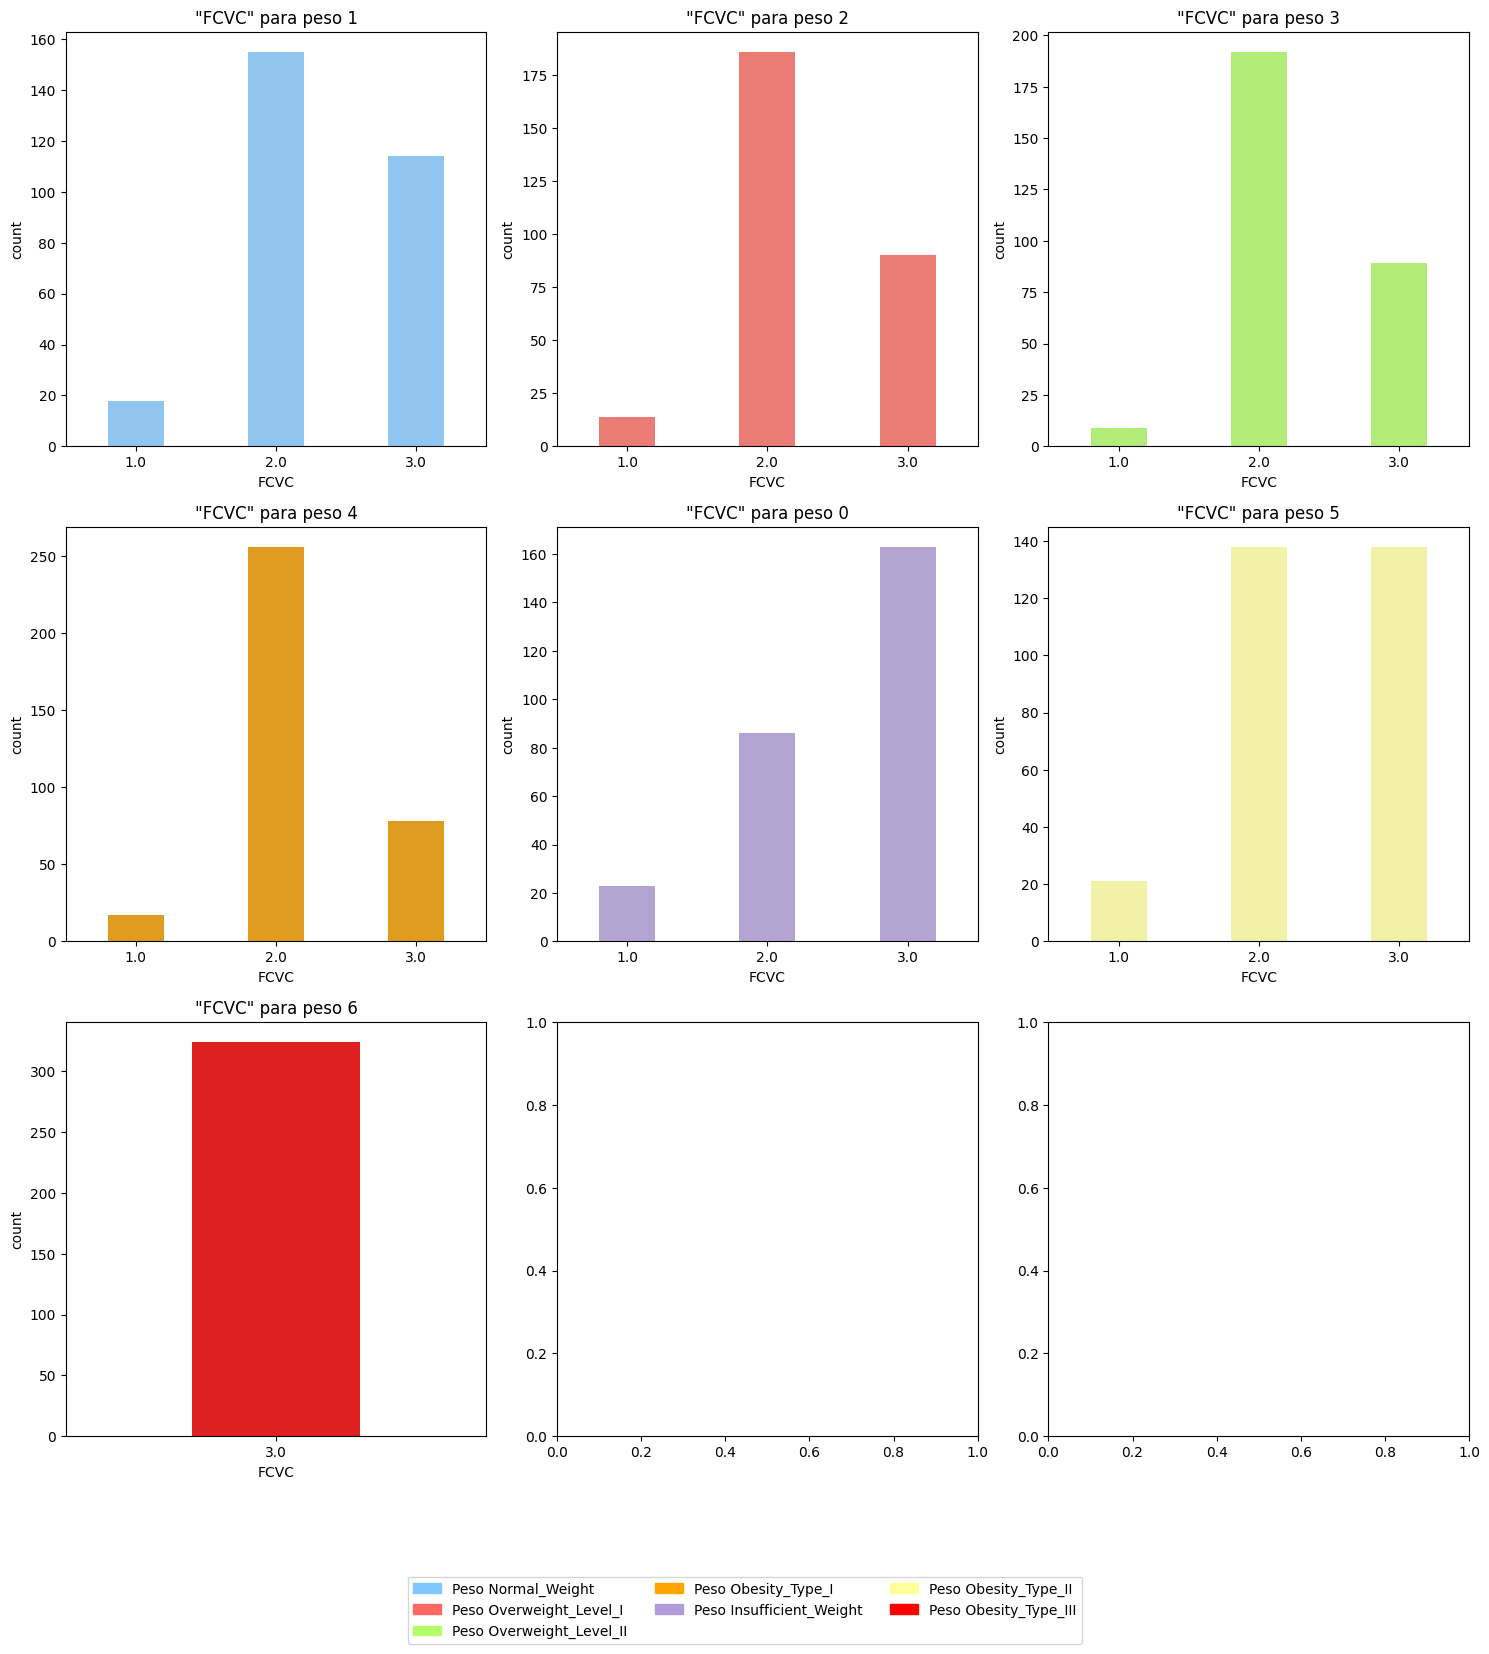

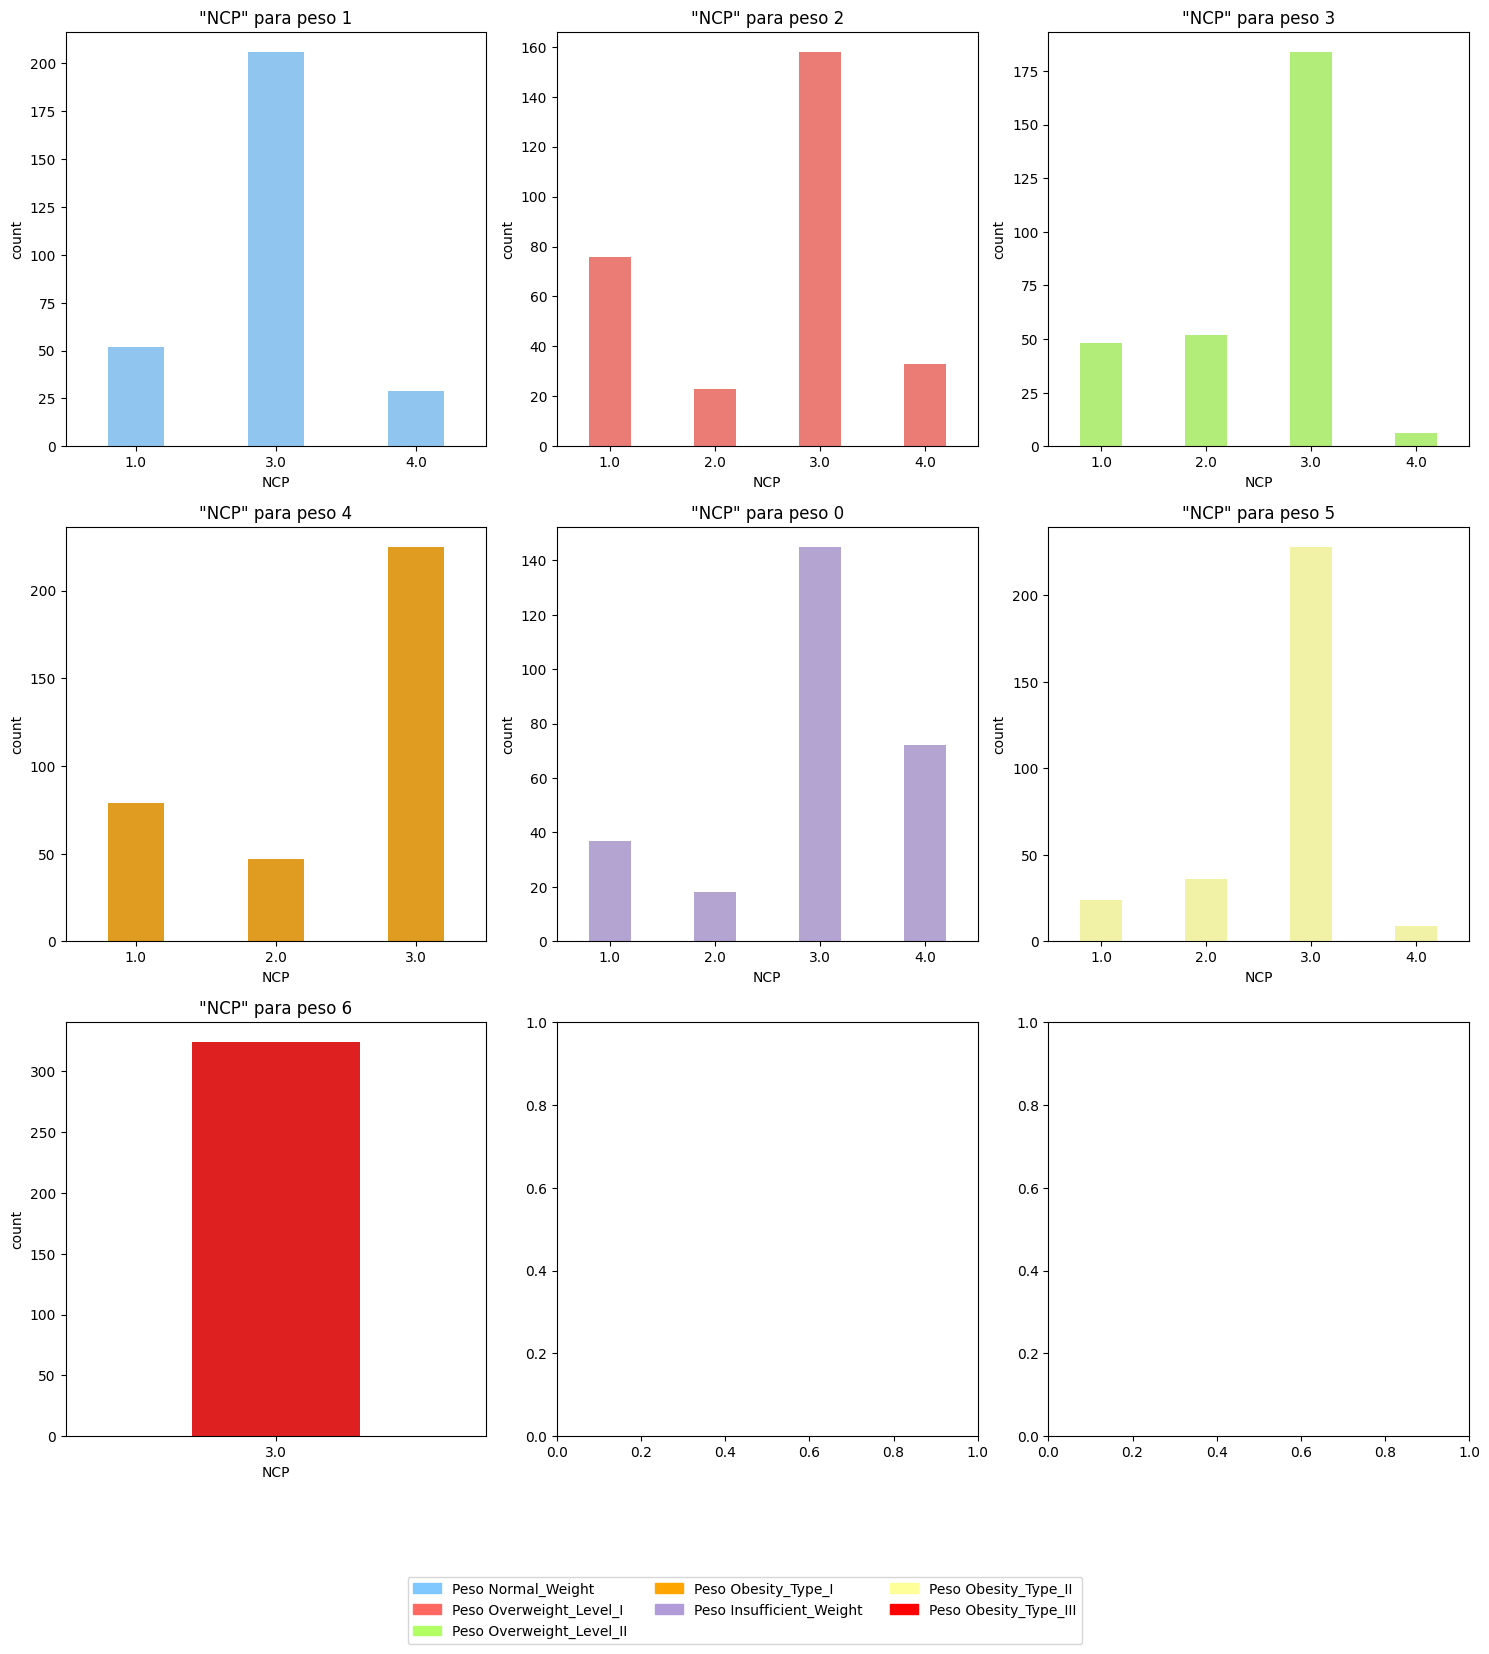

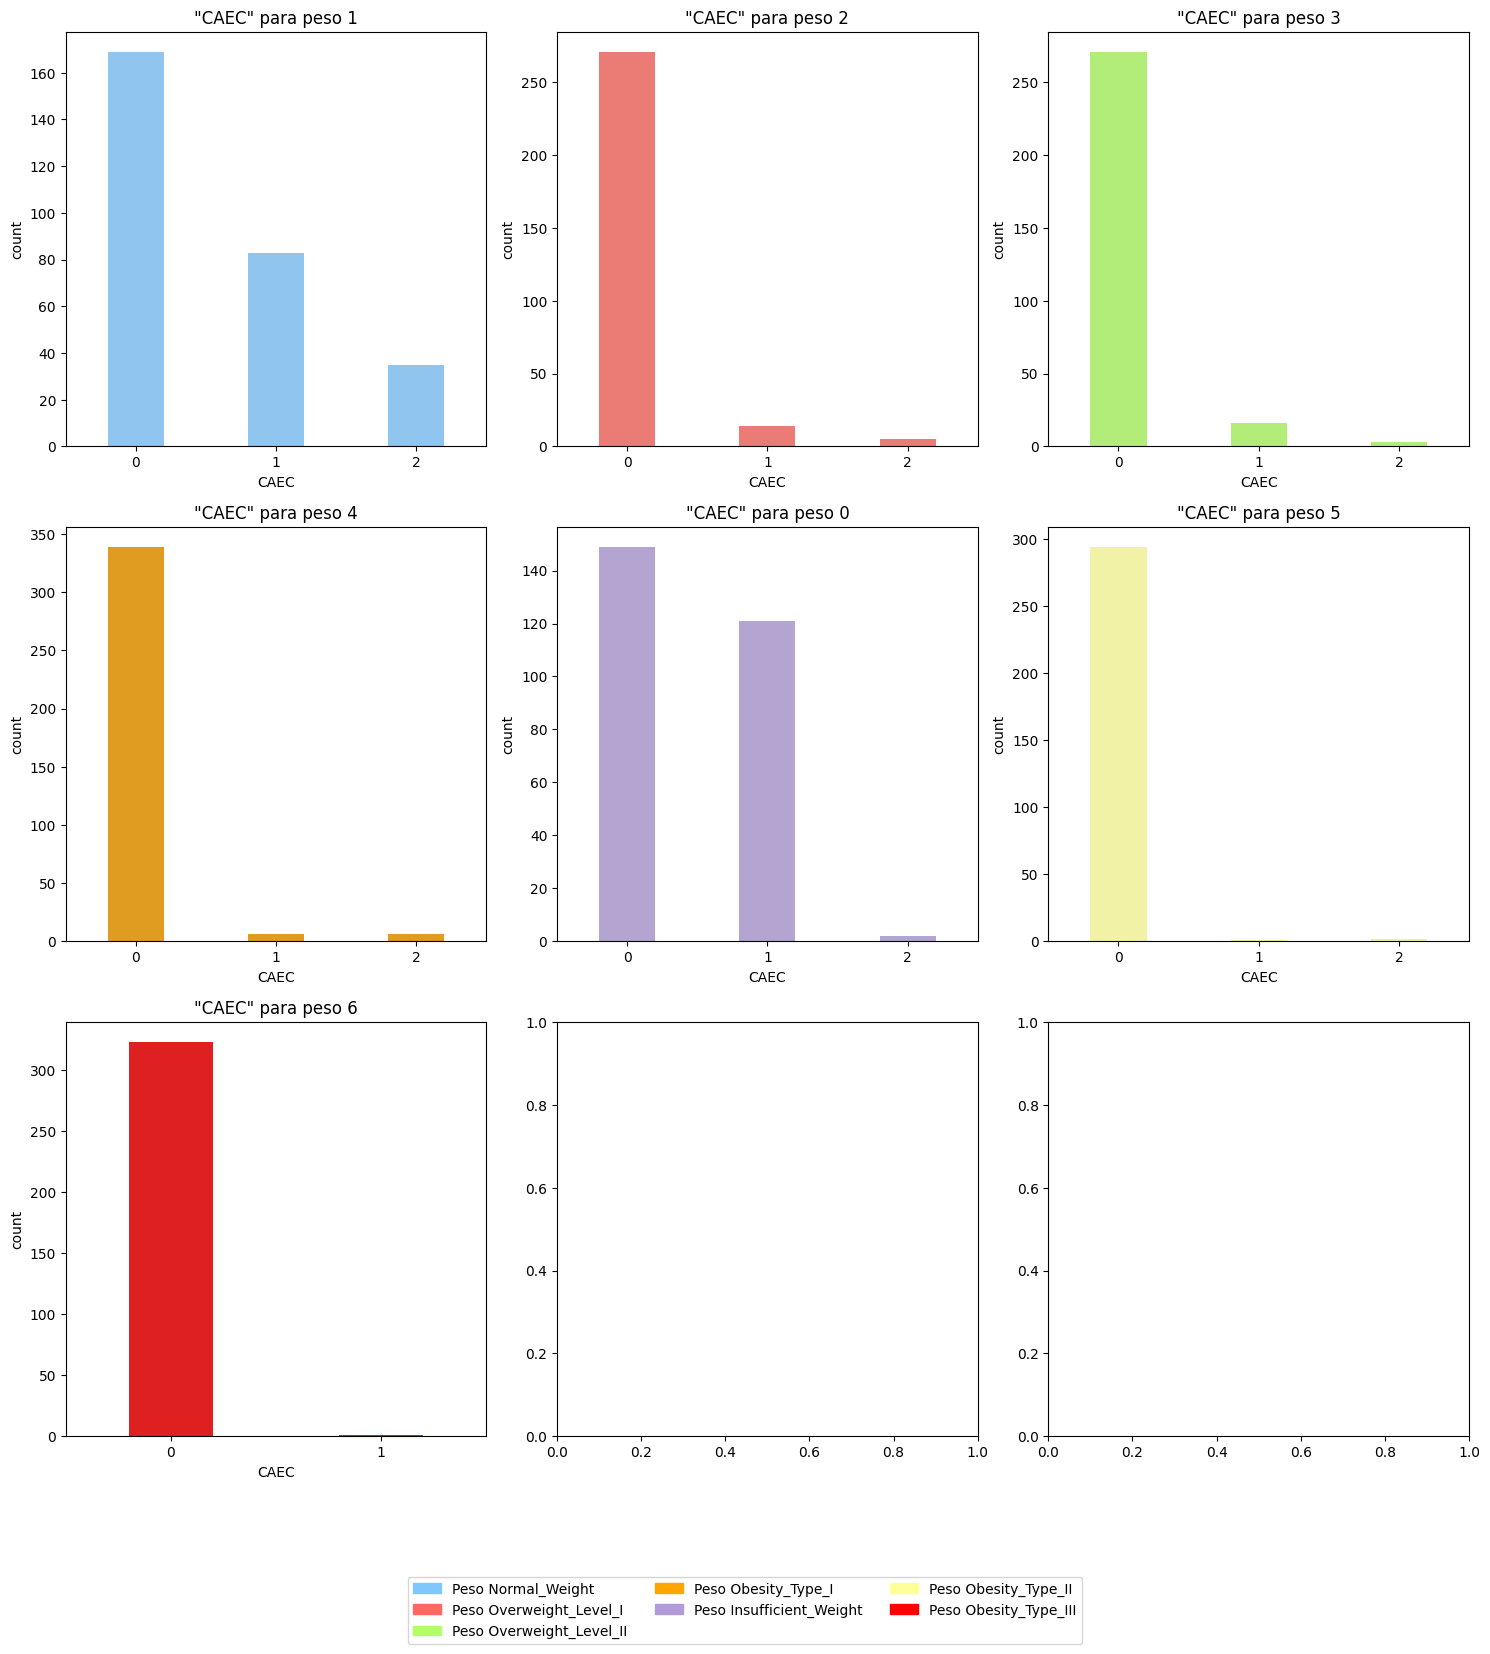

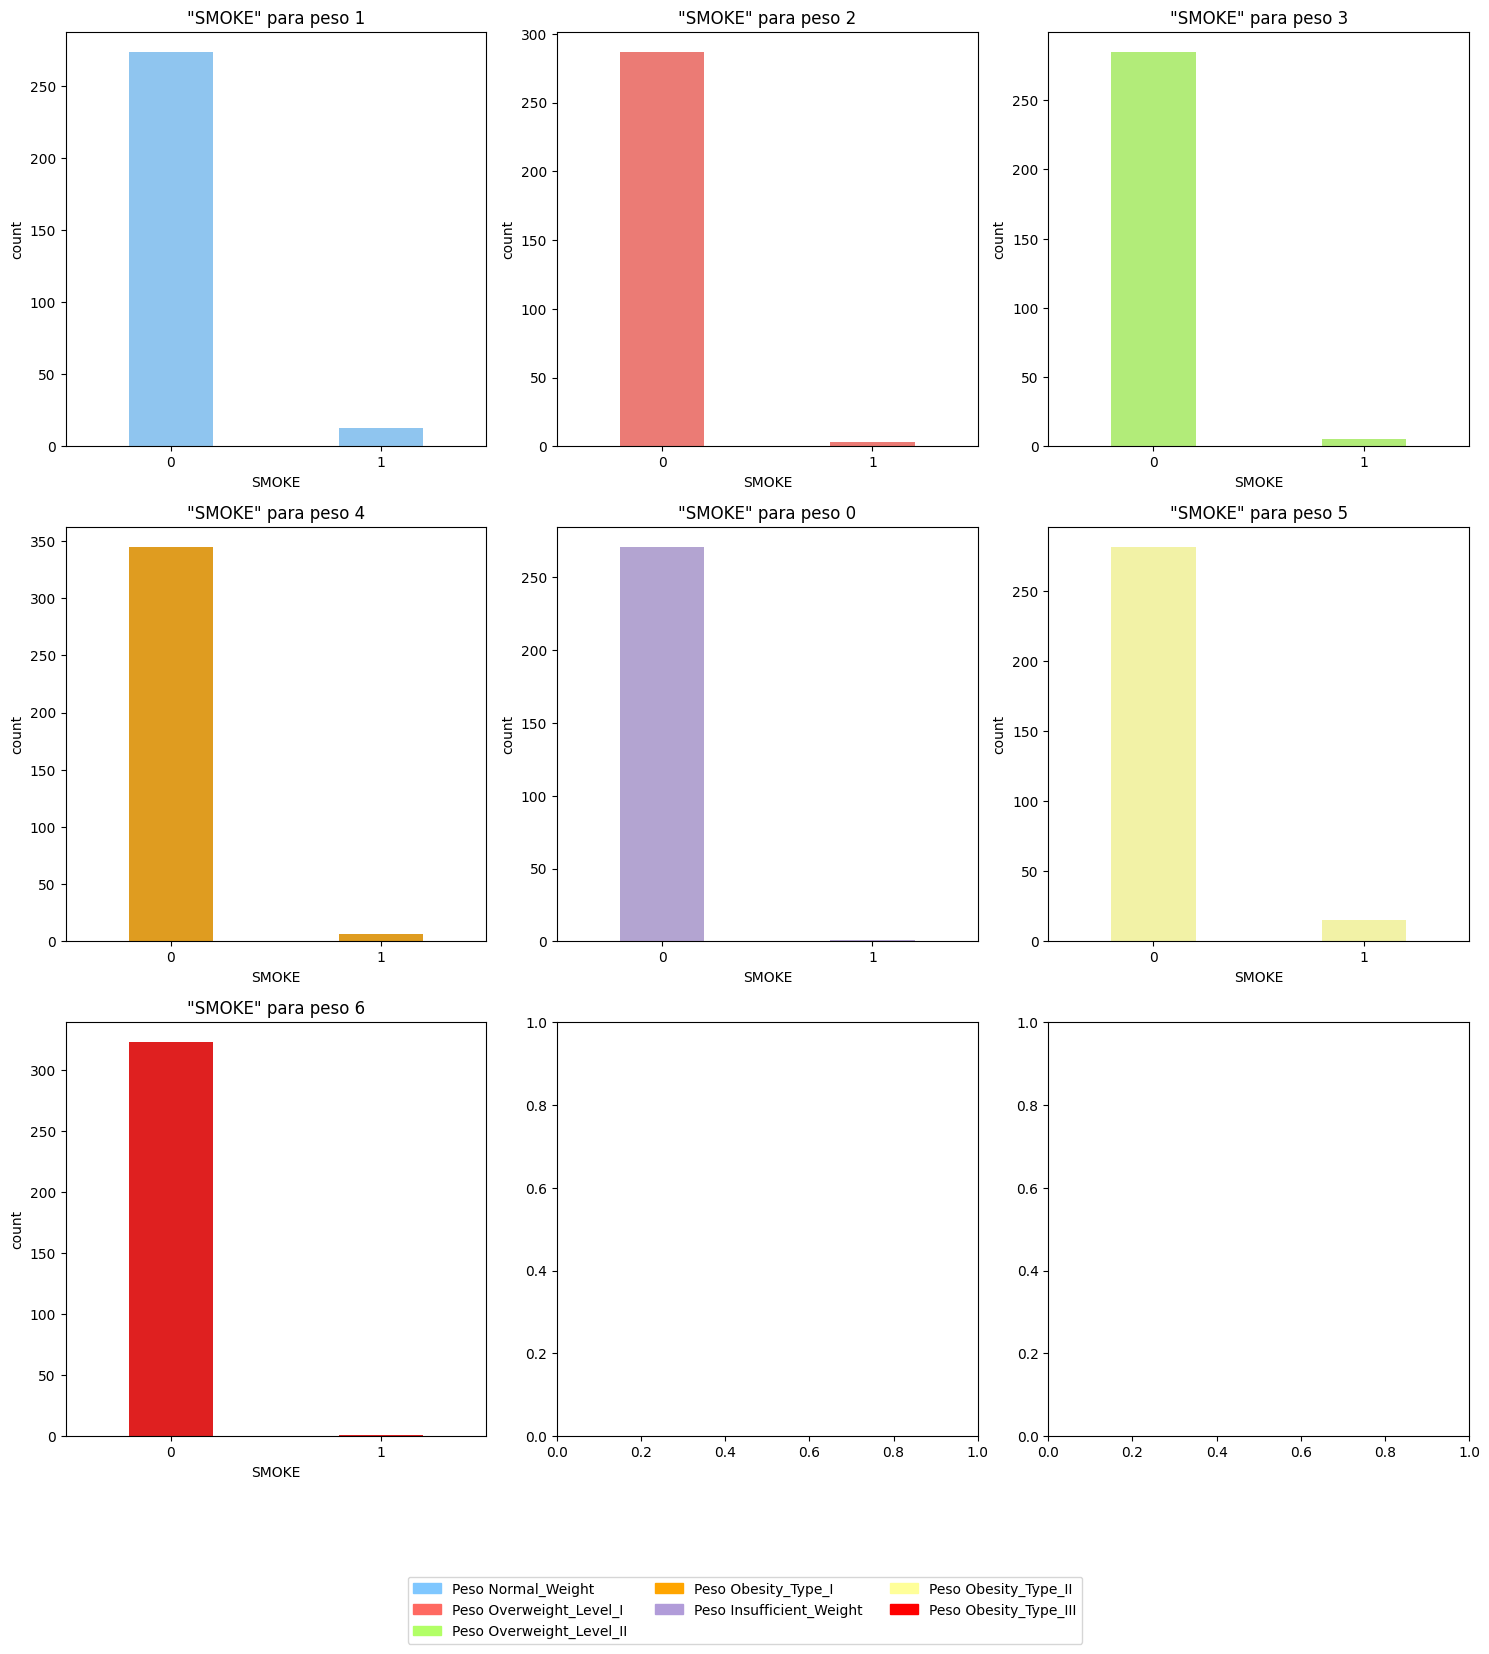

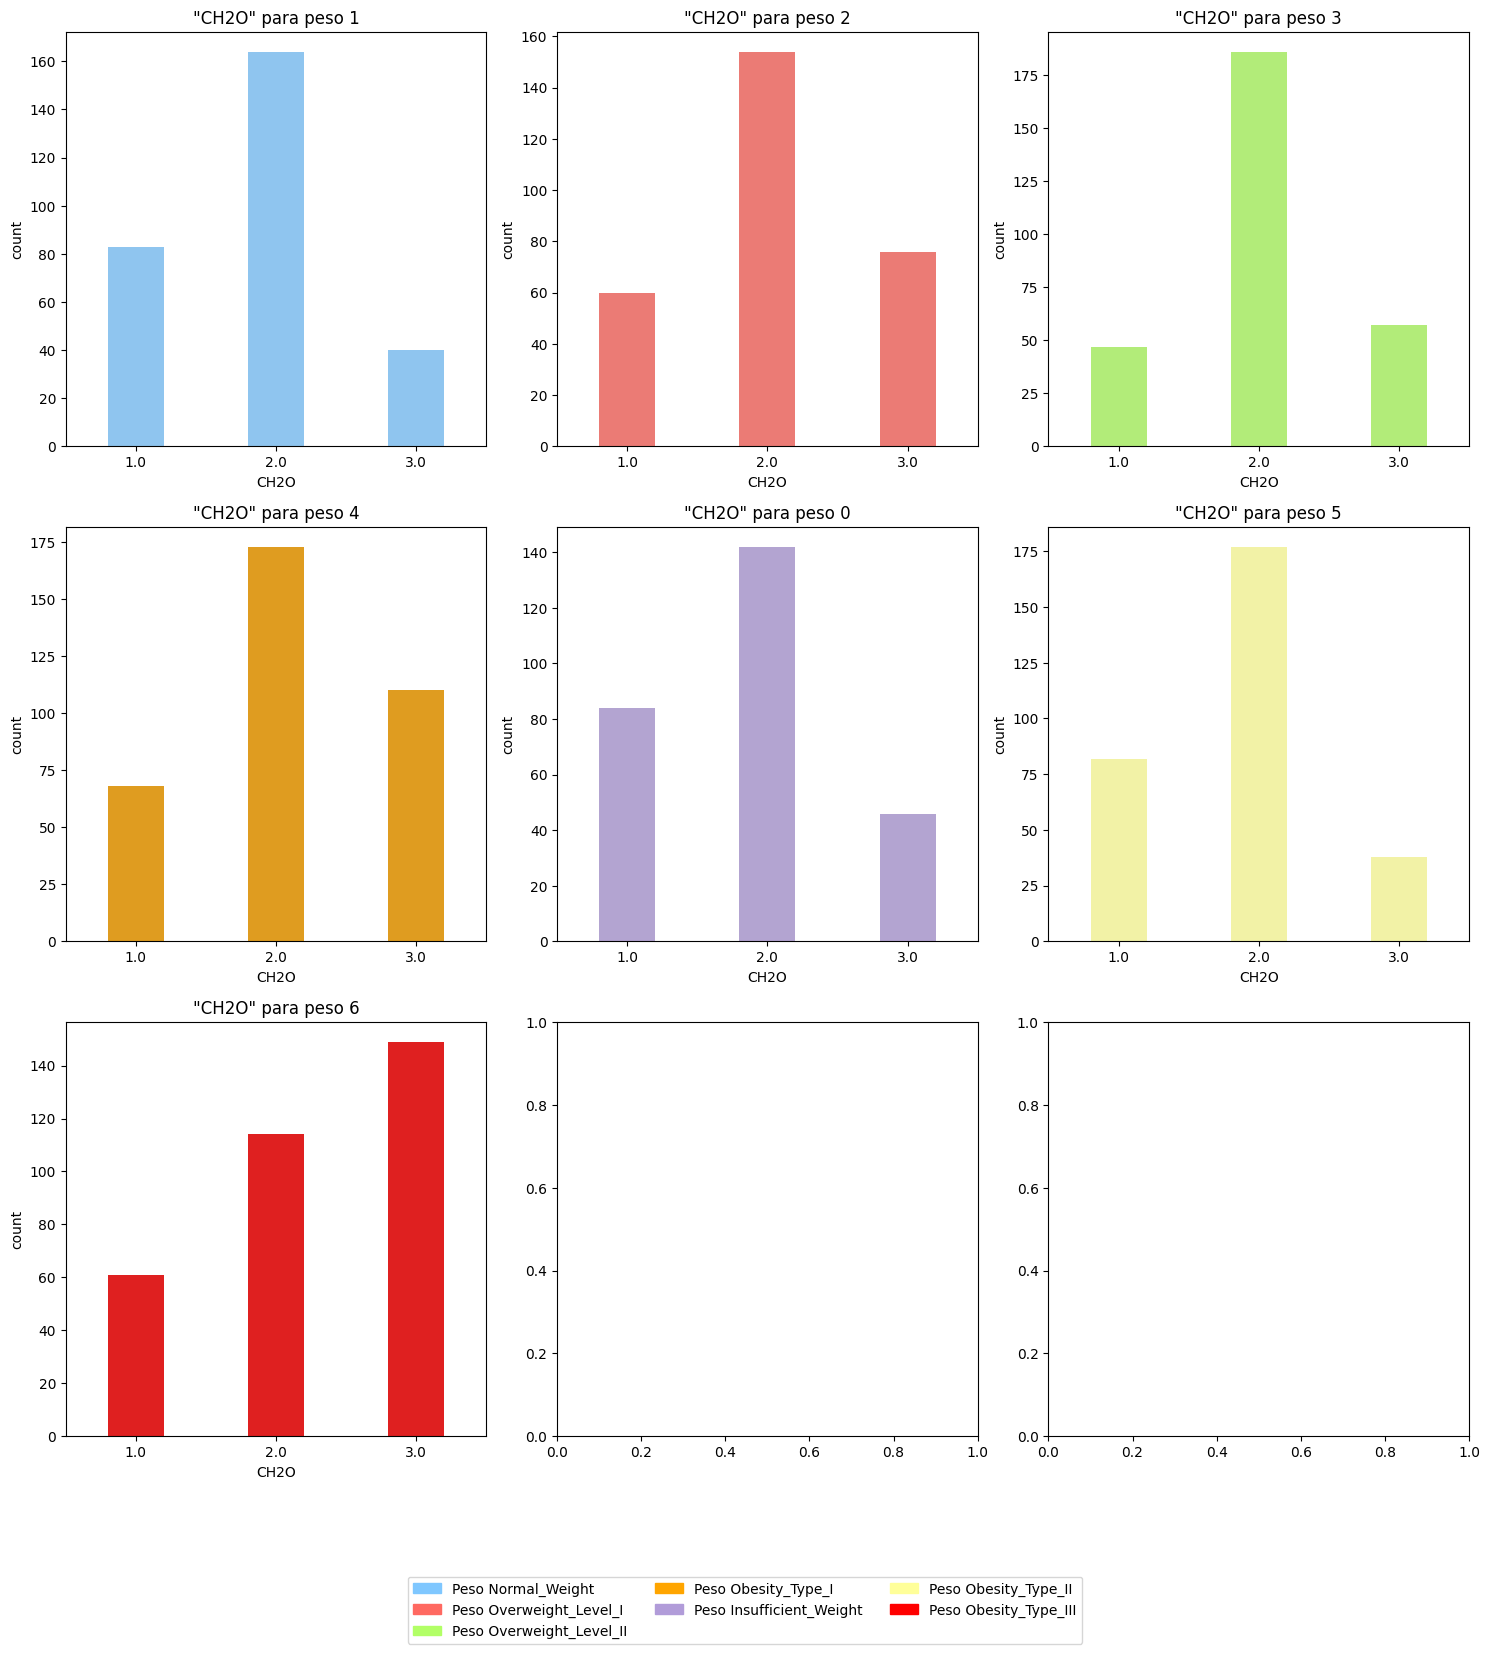

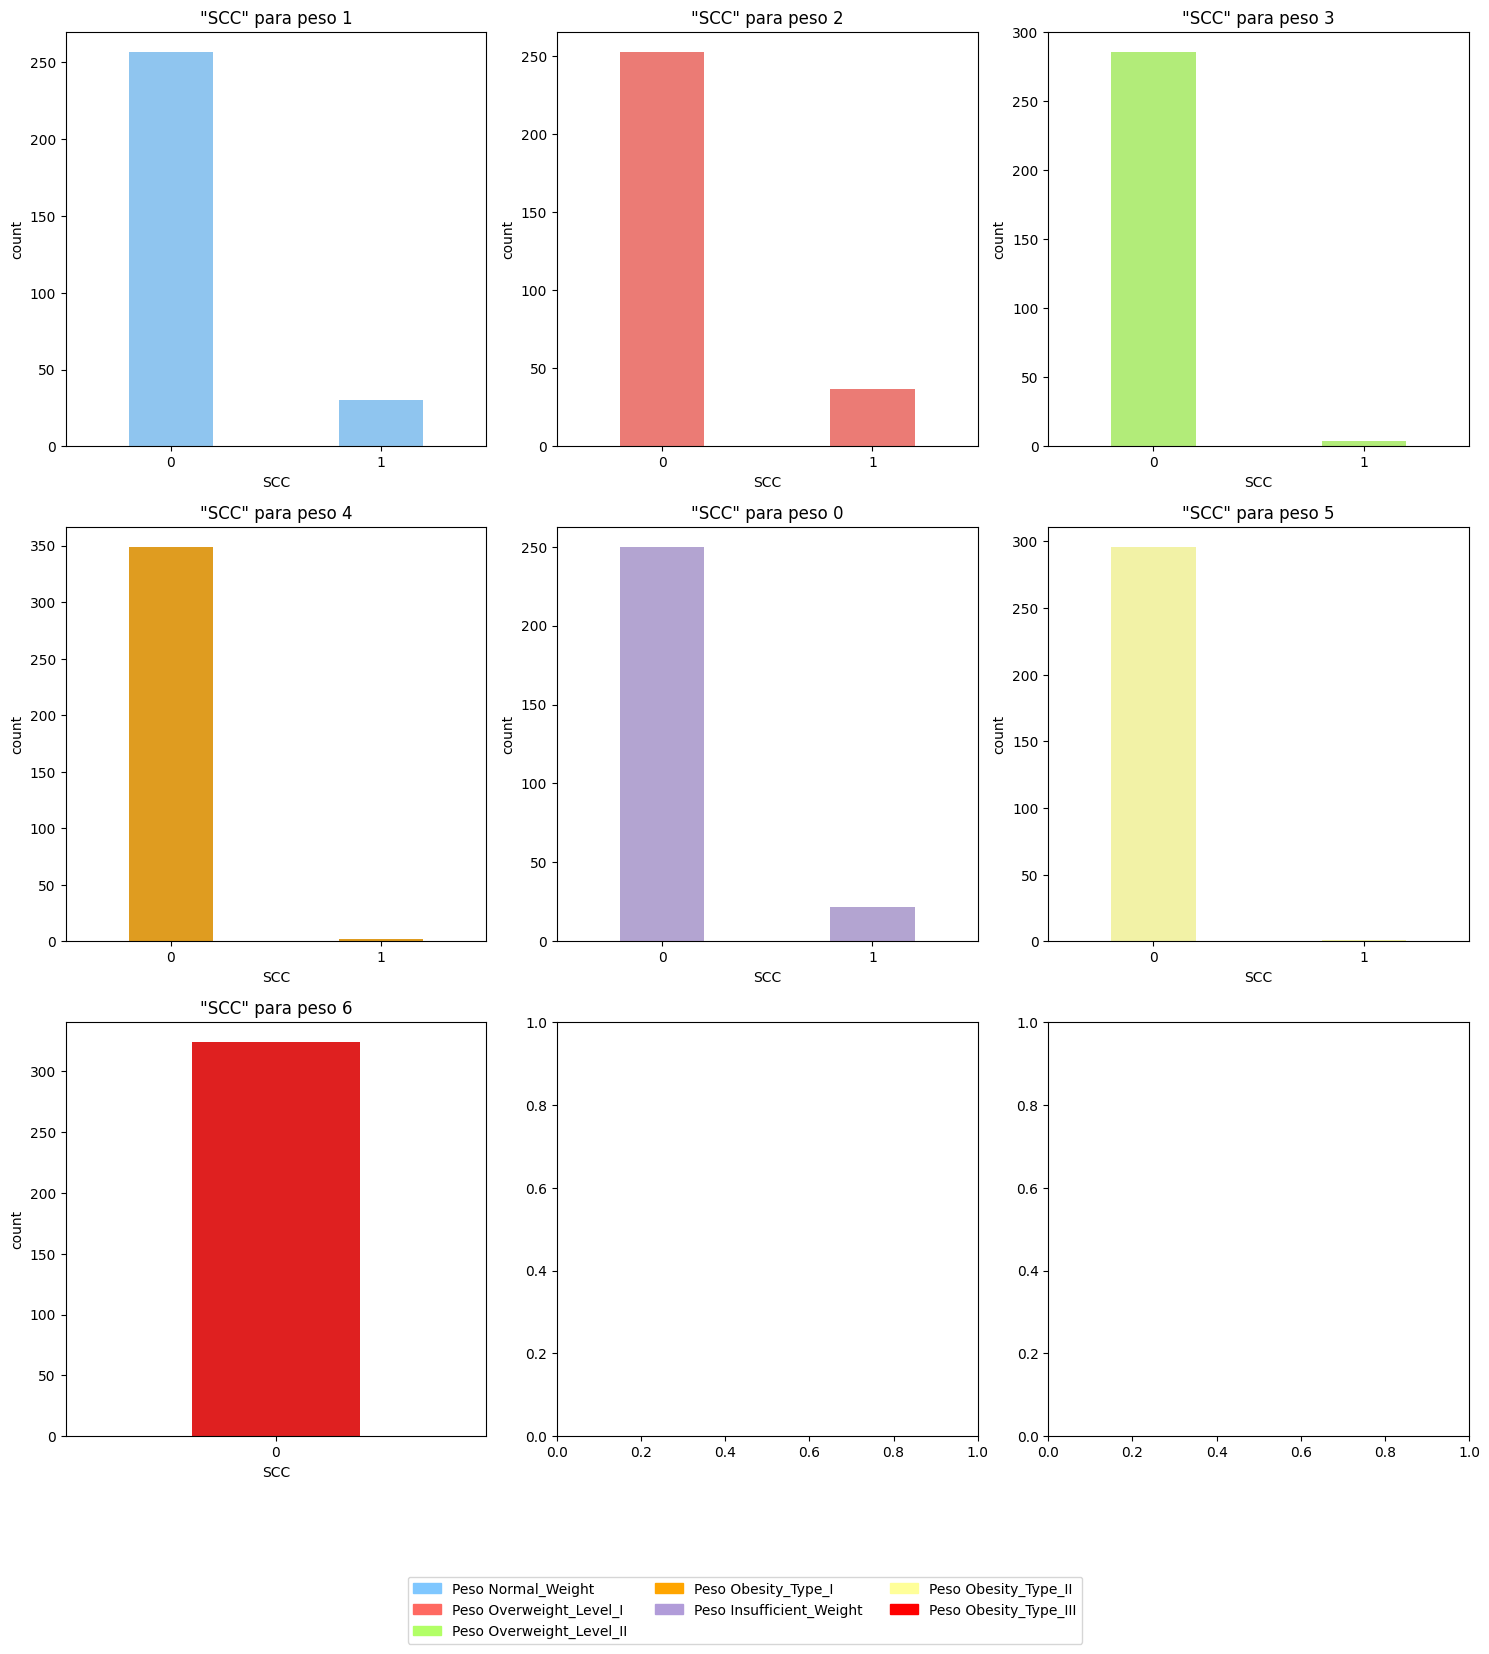

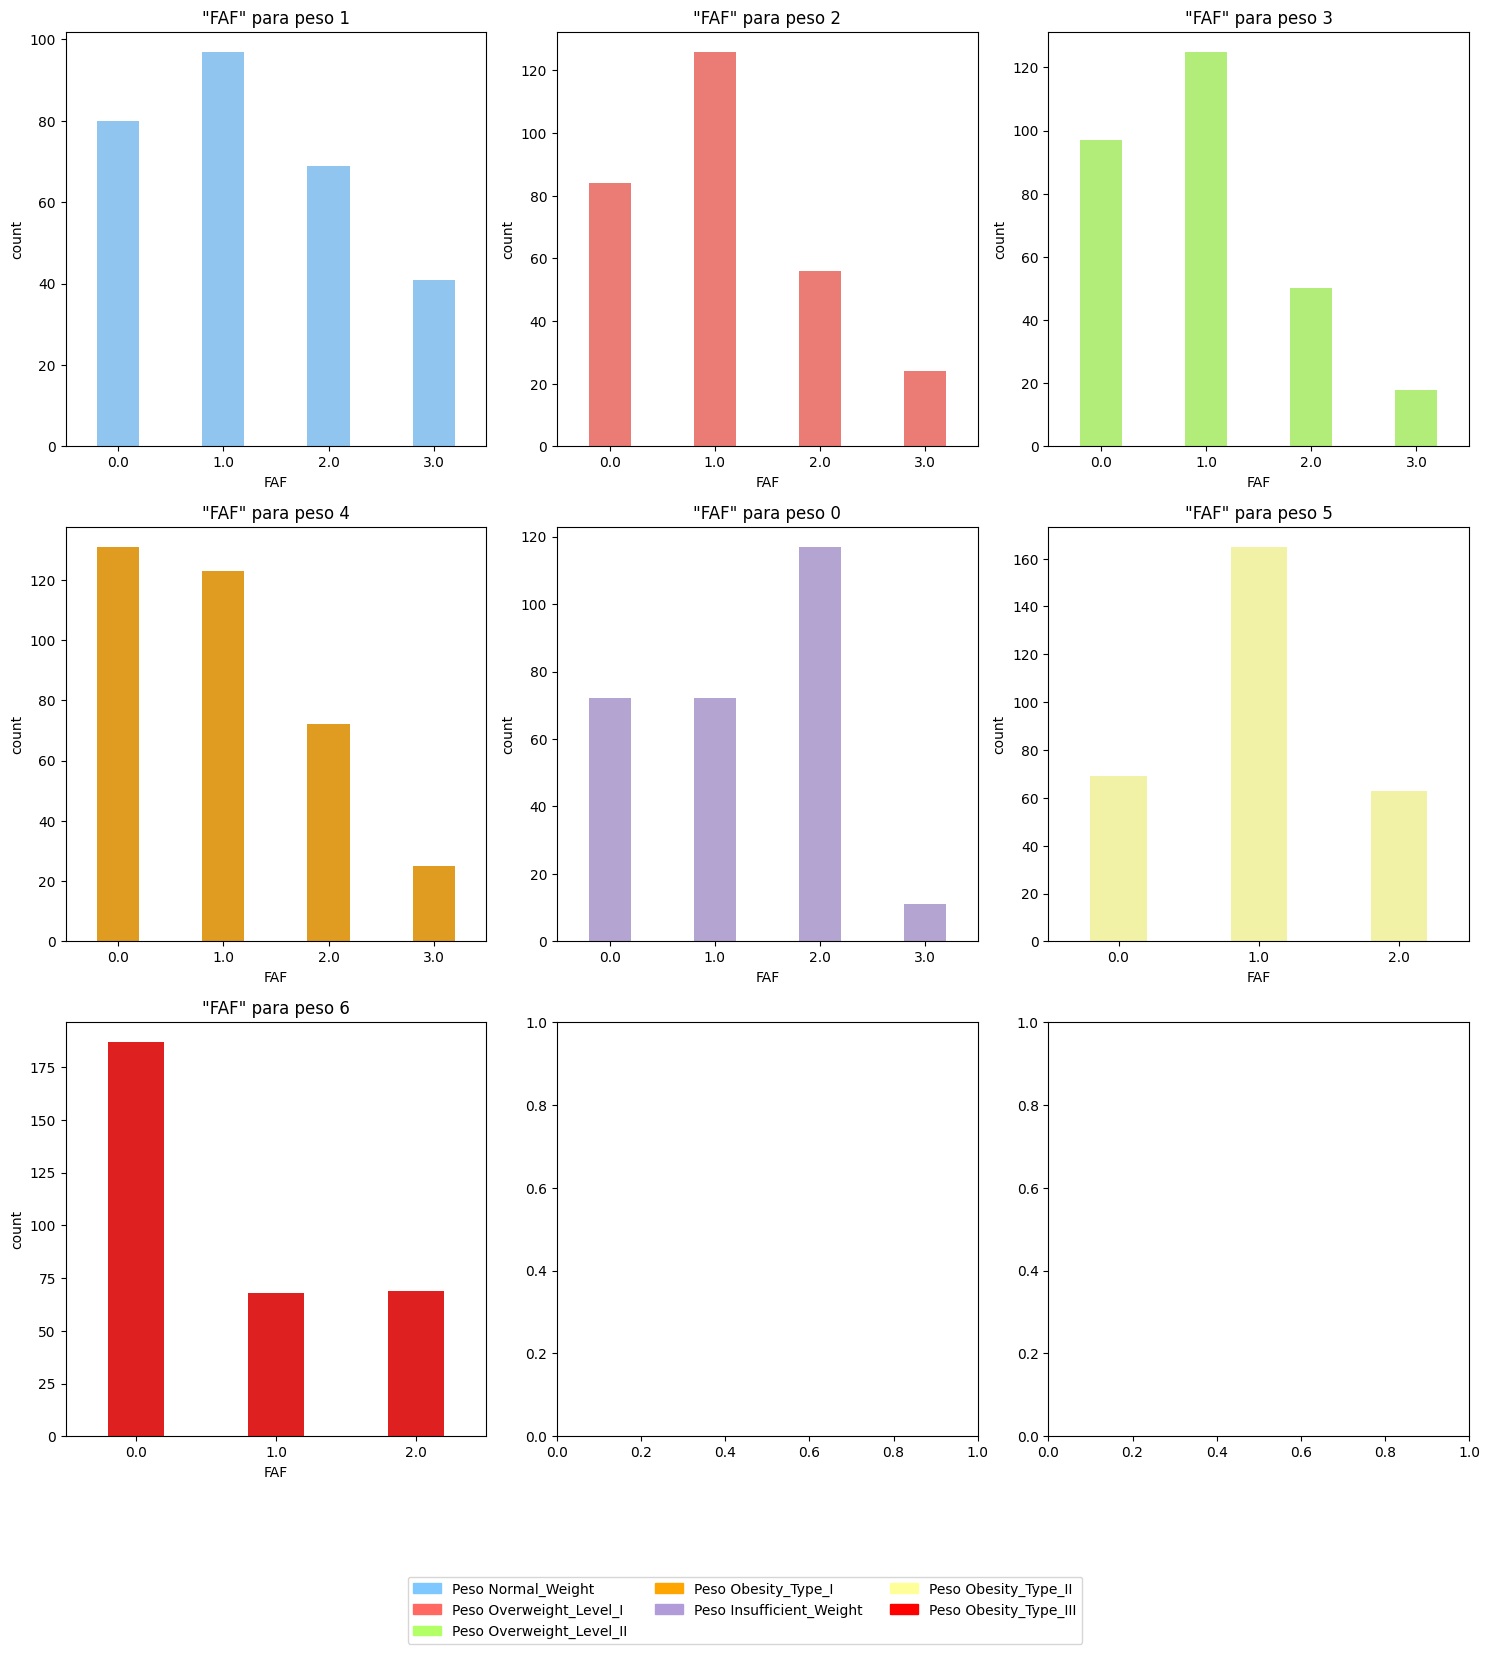

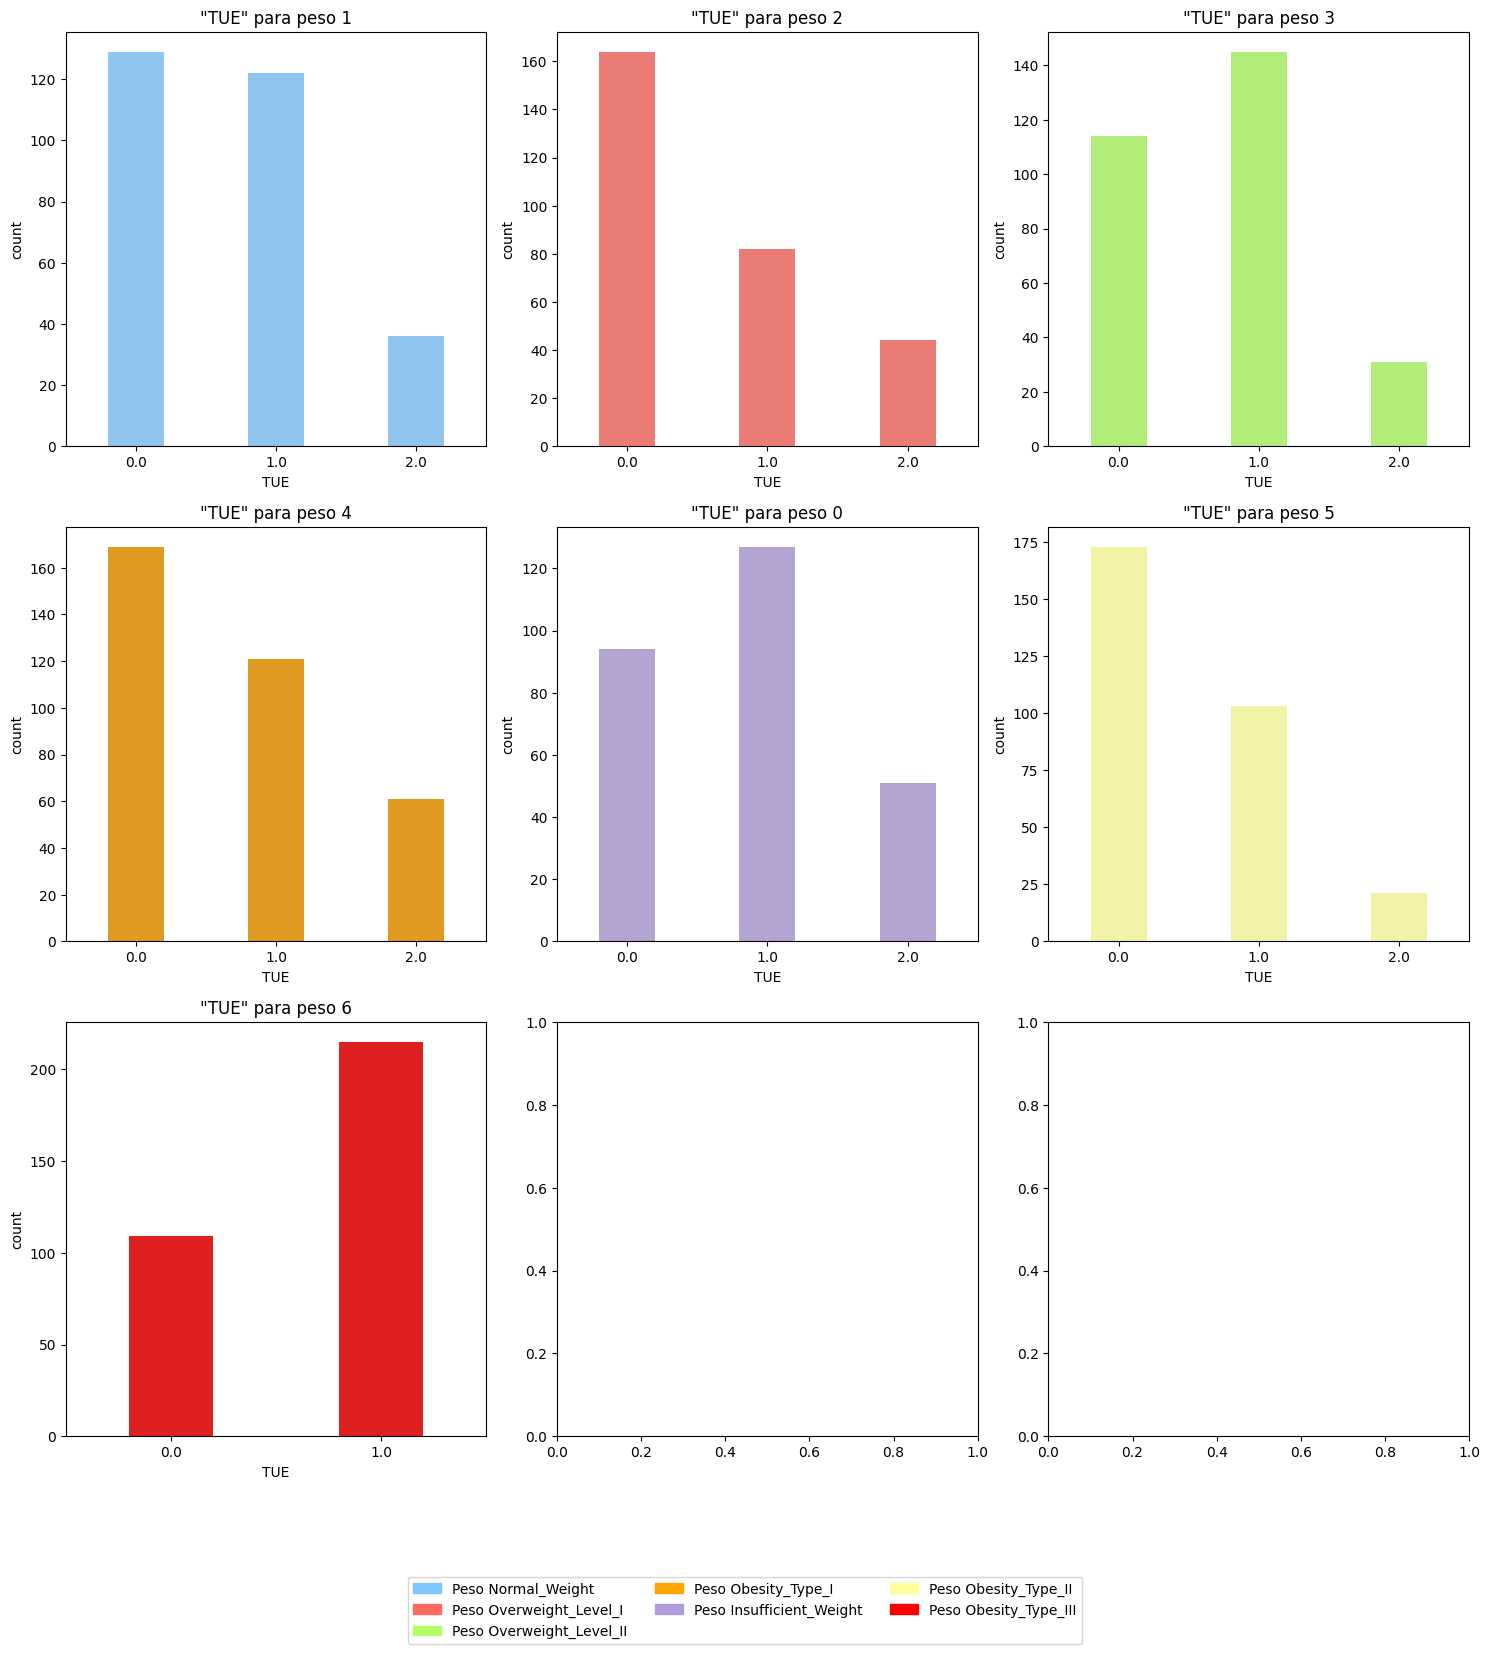

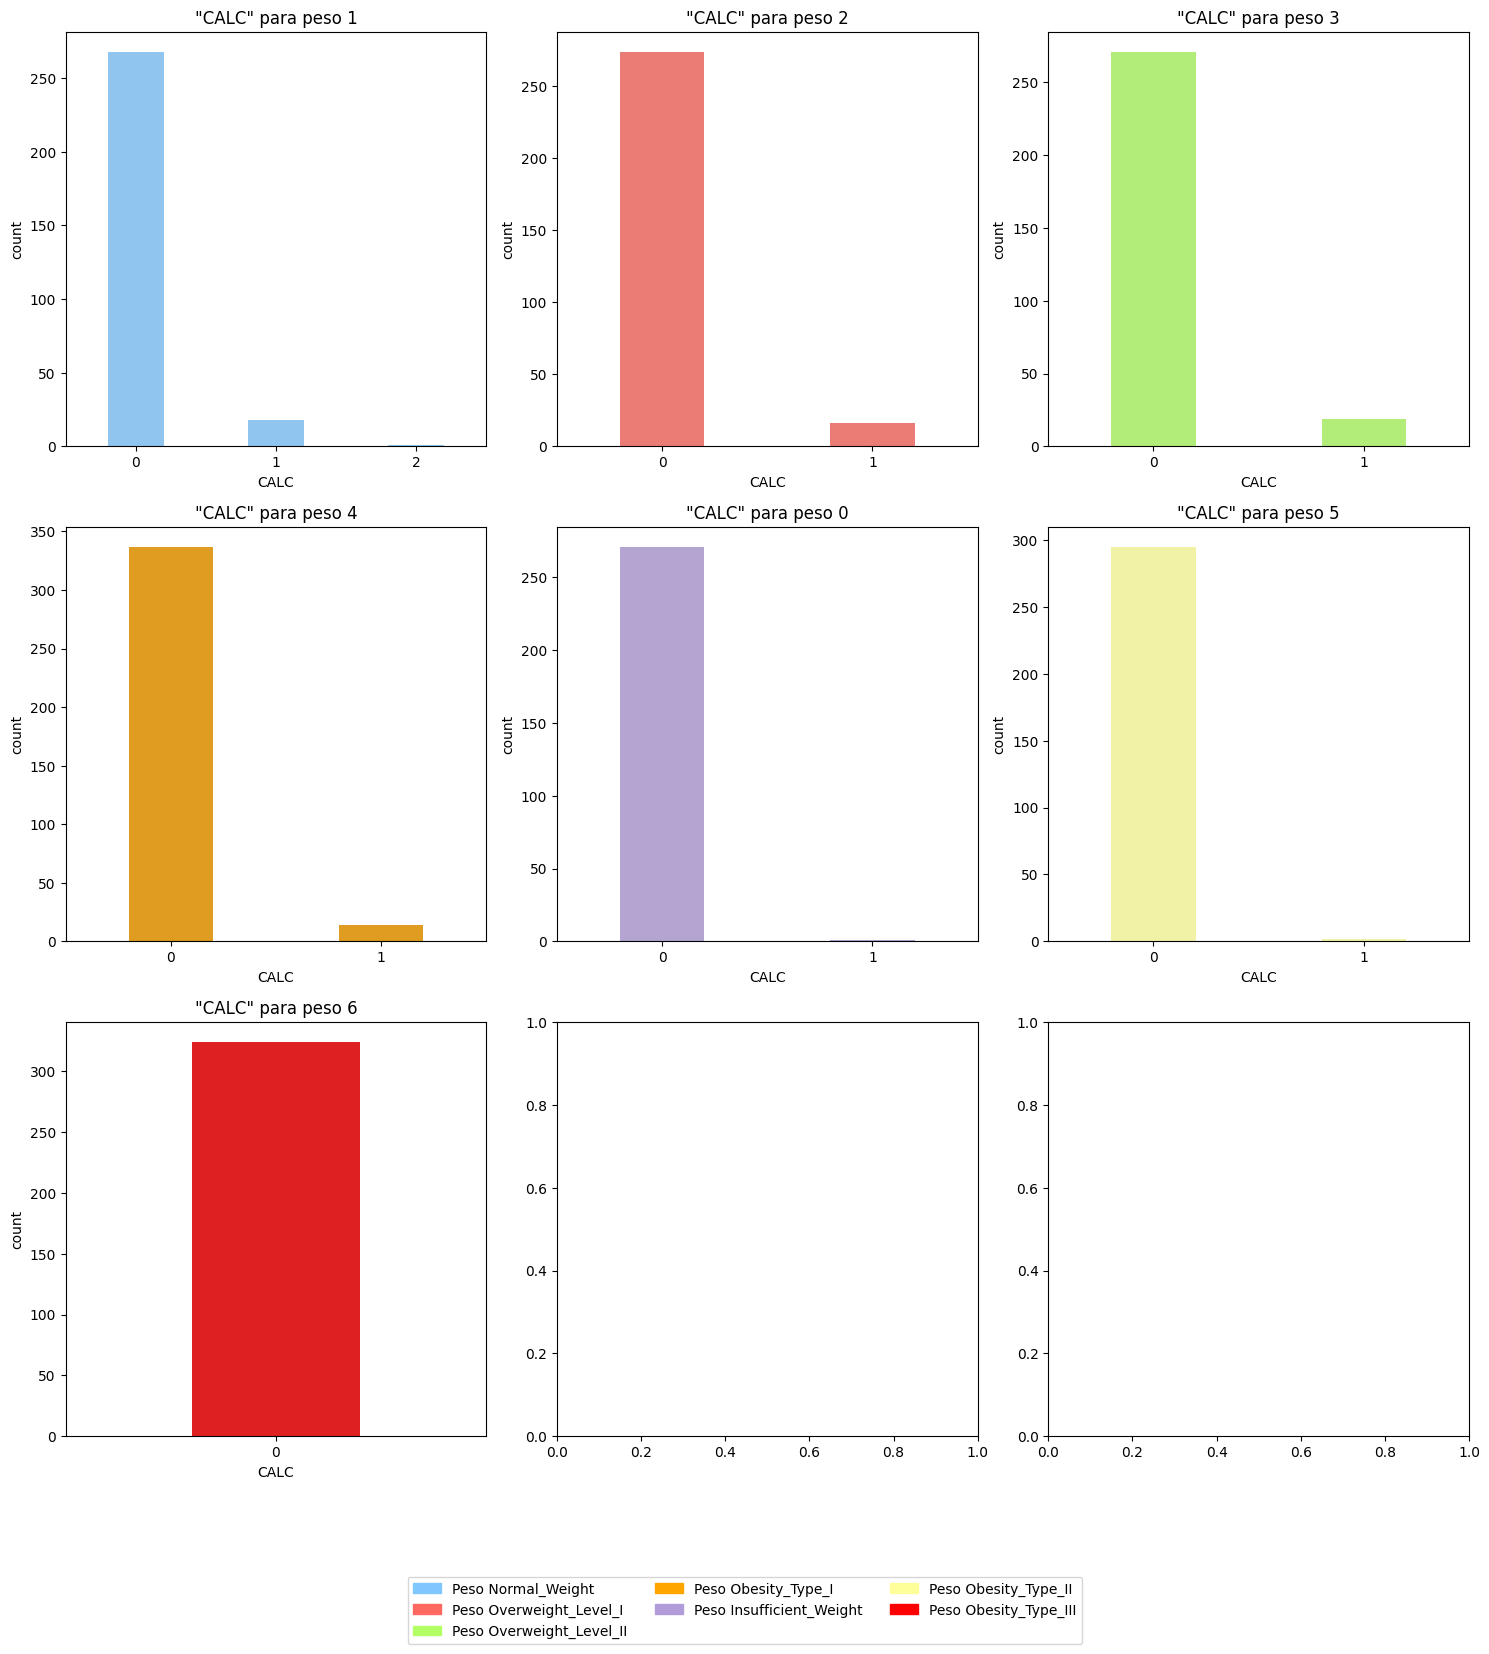

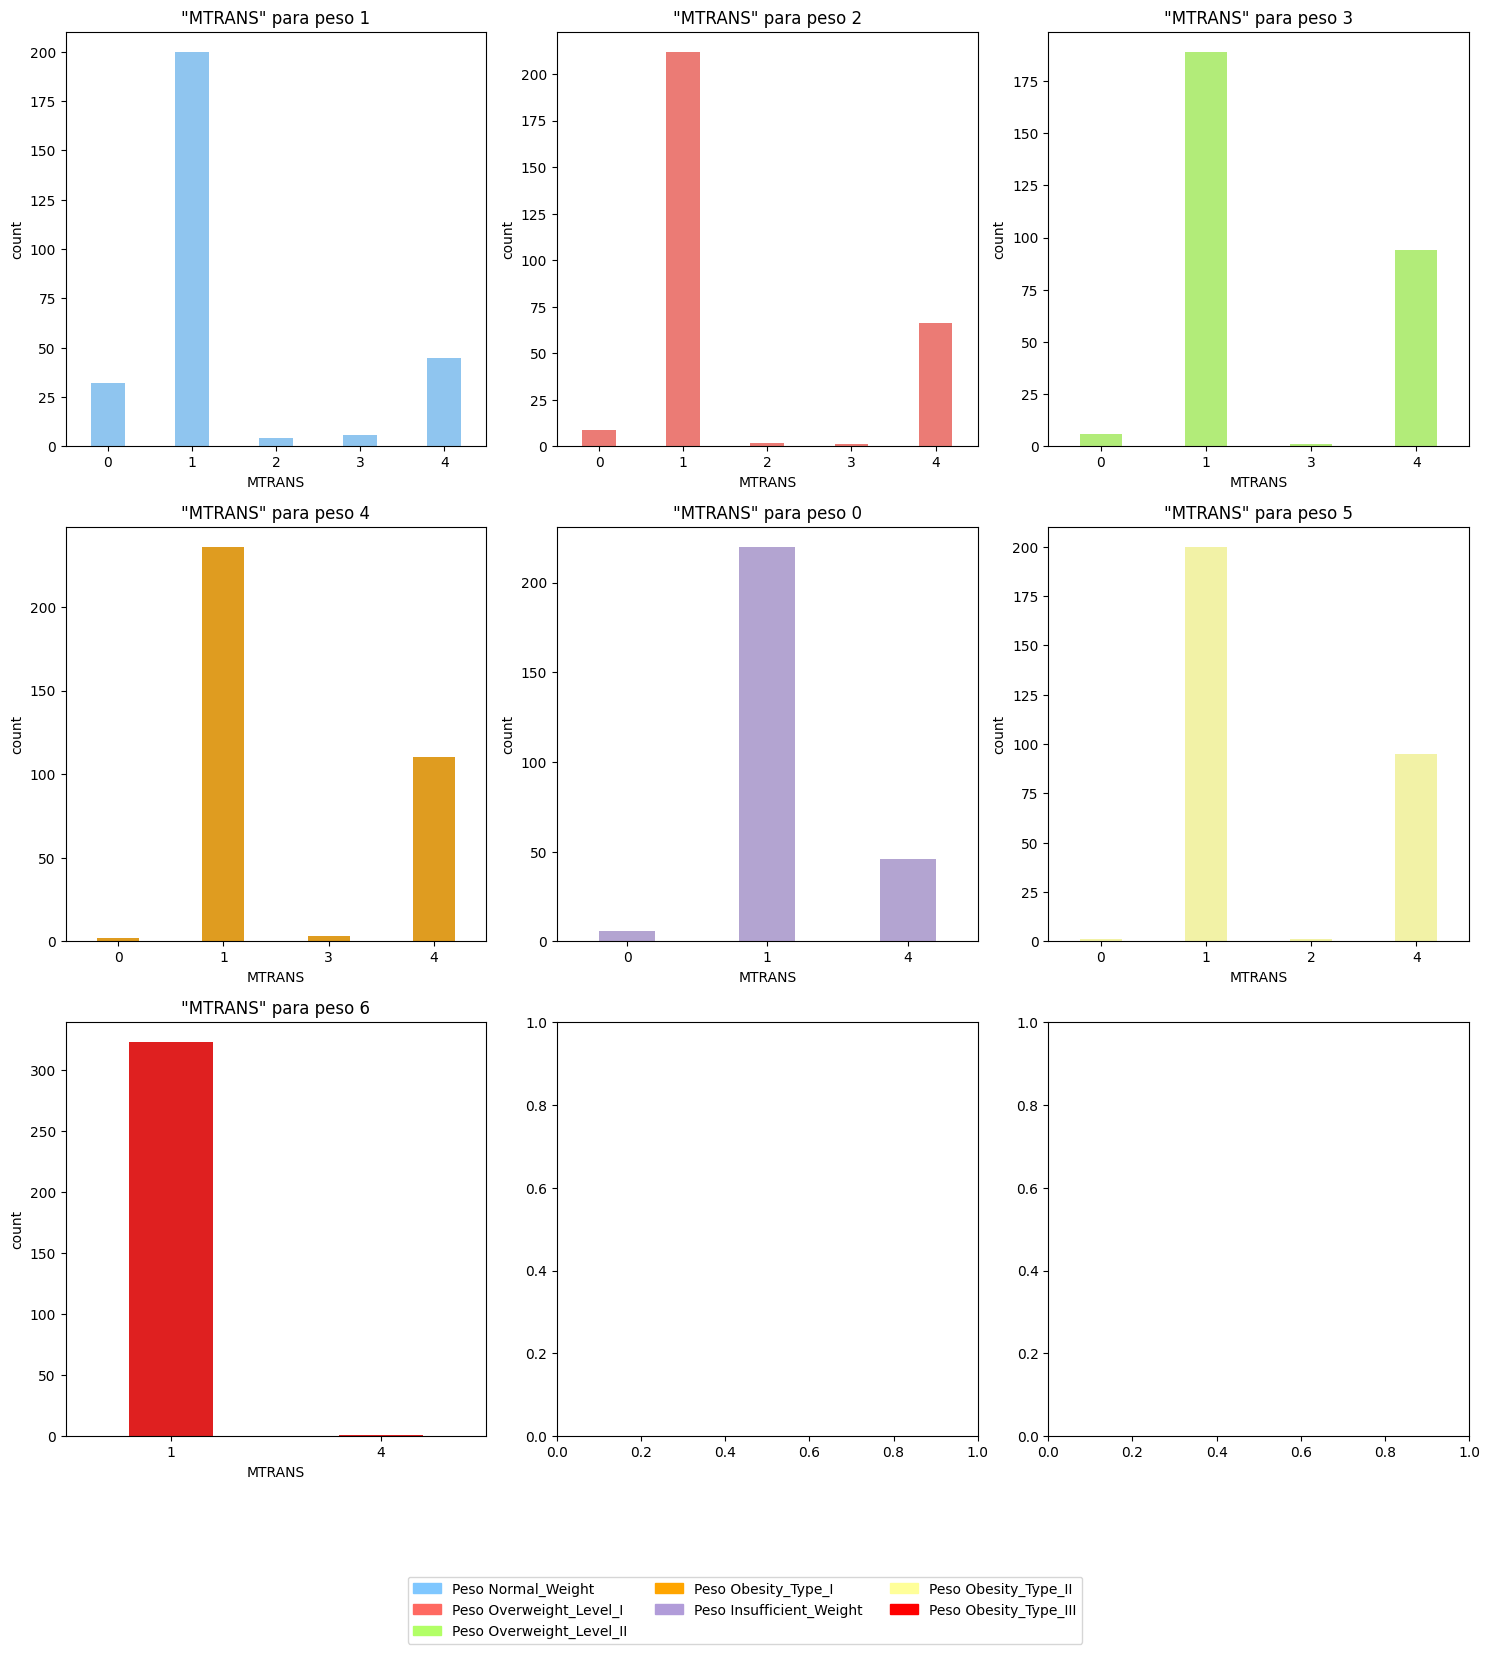

In [93]:
list_columns = data.columns
list_columns = list_columns[:-1]

for c in list_columns:
    if c == "Age": 
        pass
    else:
        fig, axs = plt.subplots(3, 3, figsize=(15, 15))
            
        for i, ax in enumerate(axs.flat):
            if i < len(weight_levels):
                categoria = weight_levels[i]
                min_data = data[data["NObeyesdad"] == categoria]
                sns.countplot(data=min_data, x=c, color=colors[i], ax=ax)
                ax.set_title(f'"{c}" para peso {categoria}')
                # Diminuir a largura das barras
                for bar in ax.patches:
                    x = bar.get_x()
                    width = bar.get_width()
                    bar.set_width(width * 0.5)  # Ajuste este valor conforme necessário
                    bar.set_x(x + width * 0.25)  # Ajustar a posição para centralizar
    
    handles = [mpatches.Patch(color=colors[i], label=f'Peso {obesity_labels[i]}') for i in range(len(weight_levels))]
    fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
    
    plt.tight_layout()
    plt.savefig(f"./plots/plt_{c}_frequencia.png")
    plt.show()
    

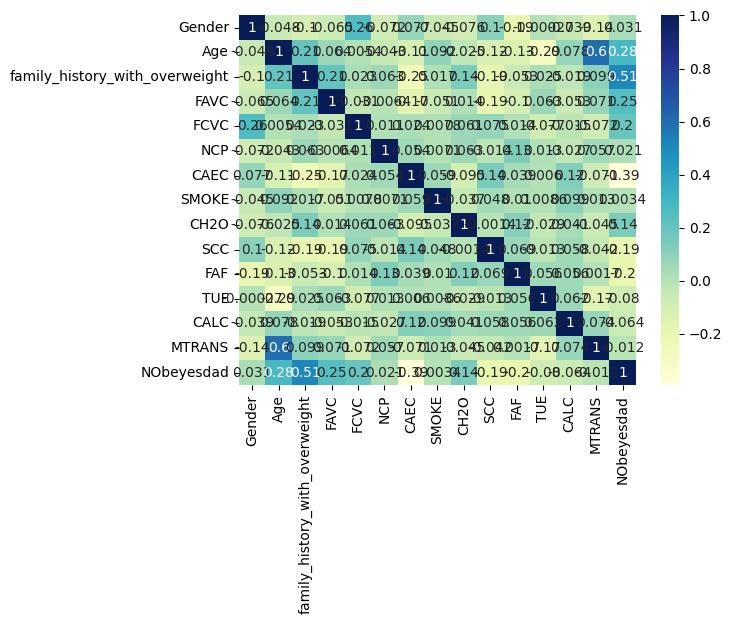

In [94]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 